In [1]:
# Importing relevant libraries

# Data wrangling
import numpy as np
import pandas as pd
from tqdm import tqdm

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Data pre-processing
from sklearn.preprocessing import StandardScaler

# Data splitting
from sklearn.model_selection import train_test_split

# Machine learning Models
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc


#Installing dependencies
# !pip install -U kaleido

In [2]:
tra=pd.read_csv("C&T train dataset.csv")
tra

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
0,1,A11,6,A34,A43,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2,A173,1,A192,A201,3
1,2,A12,48,A32,A43,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1,A173,1,A191,A201,1
2,3,A14,12,A34,A46,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1,A172,2,A191,A201,2
3,4,A11,42,A32,A42,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1,A173,2,A191,A201,1
4,5,A11,24,A33,A40,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2,A173,2,A191,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,A14,9,A32,A42,A62,A72,2.0,A92,A101,...,A122,22.0,A143,A151,1,A173,1,A191,A201,2
796,797,A11,18,A32,A41,A65,A75,1.0,A93,A101,...,A122,51.0,A143,A153,1,A173,2,A192,A201,1
797,798,A14,12,A34,A42,A61,A72,2.0,A92,A101,...,A122,22.0,A143,A151,2,A172,1,A191,A201,3
798,799,A14,24,A33,A40,A65,A75,4.0,A94,A101,...,A123,54.0,A143,A152,2,A173,1,A192,A201,3


In [3]:
# shape of data
tra.shape

(800, 21)

In [4]:
tra.info

<bound method DataFrame.info of      sno acc_info  duration_month credit_history purpose savings_acc  \
0      1      A11               6            A34     A43         A65   
1      2      A12              48            A32     A43         A61   
2      3      A14              12            A34     A46         A61   
3      4      A11              42            A32     A42         A61   
4      5      A11              24            A33     A40         A61   
..   ...      ...             ...            ...     ...         ...   
795  796      A14               9            A32     A42         A62   
796  797      A11              18            A32     A41         A65   
797  798      A14              12            A34     A42         A61   
798  799      A14              24            A33     A40         A65   
799  800      A12               9            A32     A40         A65   

    employment_st  poi personal_status gurantors  ...  property_type   age  \
0             A75  4.0   

In [5]:
tra.isnull().any().sum()
tr = tra

In [6]:
tr.dropna(inplace=True)

In [7]:
tr.shape

(761, 21)

In [8]:
target=tr['Group_no'].unique()

In [9]:
target

array([3, 1, 2], dtype=int64)

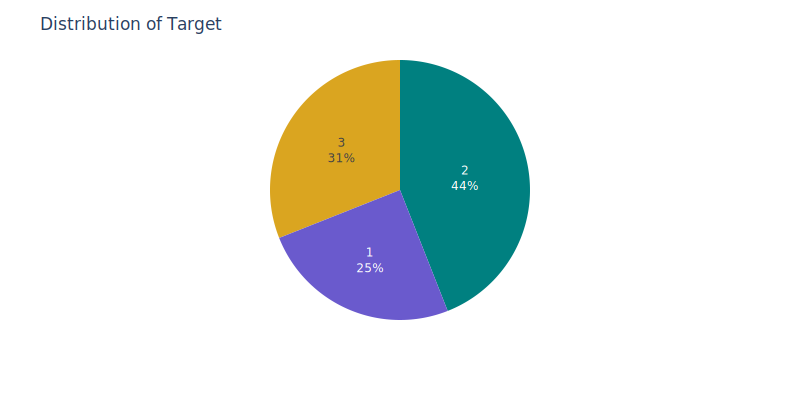

In [10]:
# Distribution of Target feature
fig = px.pie(values= tr['Group_no'].value_counts(),names= tr['Group_no'].value_counts().index.to_list())

fig.update_traces(textposition='inside', textinfo='percent+label',marker=dict(colors=['teal', 'goldenrod', 'slateblue']))

fig.update_layout(showlegend = False, height=400, width=800, title='Distribution of Target')
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

In [11]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# Copy the dataframe to avoid modifying the original data
tra_copy = tra.copy()

# Convert categorical columns to numeric using label encoding
label_encoders = {}
for col in tra_copy.columns:
    if tra_copy[col].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        tra_copy[col] = le.fit_transform(tra_copy[col])
        label_encoders[col] = le

# Compute correlation matrix using only numeric columns
numeric_columns = tra_copy.select_dtypes(include=['number']).columns
correlation_matrix = tra_copy[numeric_columns].corr().round(2)

# Plot the correlation heatmap
fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')
fig.update_layout(title='Correlation Analysis for independent features', height=800, width=1500)


In [12]:
te=pd.read_csv("C&T test dataset.csv")
te

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
1,2,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
2,3,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
3,4,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
4,5,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,A14,12,A32,A42,A61,A74,3.0,A92,A101,4,A121,31.0,A143,A152,1,A172,1,A191,A201
196,197,A11,30,A32,A41,A61,NaN,4.0,A91,A101,4,A122,40.0,A143,A152,1,A174,1,A192,A201
197,198,A14,12,A32,A43,A61,A75,4.0,A93,A101,4,A123,38.0,A143,NaN,1,A173,1,A191,A201
198,199,A11,45,A32,A43,A61,A73,4.0,A93,A101,4,A124,23.0,A143,A153,1,A173,1,A192,A201


In [13]:
te.shape

(200, 20)

In [14]:
tra.head


<bound method NDFrame.head of      sno acc_info  duration_month credit_history purpose savings_acc  \
0      1      A11               6            A34     A43         A65   
1      2      A12              48            A32     A43         A61   
2      3      A14              12            A34     A46         A61   
3      4      A11              42            A32     A42         A61   
4      5      A11              24            A33     A40         A61   
..   ...      ...             ...            ...     ...         ...   
795  796      A14               9            A32     A42         A62   
796  797      A11              18            A32     A41         A65   
797  798      A14              12            A34     A42         A61   
798  799      A14              24            A33     A40         A65   
799  800      A12               9            A32     A40         A65   

    employment_st  poi personal_status gurantors  ...  property_type   age  \
0             A75  4.0     

In [15]:
# Assigning x and y features
y = np.array(tra_copy['Group_no'])
X_features = tra_copy.drop('Group_no', axis = 1)
X_features.head()

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,0,6,4,4,4,4,4.0,2,0,4,0,67.0,2,1,2,2,1,1,0
1,2,1,48,2,4,0,2,2.0,1,0,2,0,22.0,2,1,1,2,1,0,0
2,3,3,12,4,7,0,3,2.0,2,0,3,0,49.0,2,1,1,1,2,0,0
3,4,0,42,2,3,0,3,2.0,2,2,4,1,45.0,2,2,1,2,2,0,0
4,5,0,24,3,0,0,2,3.0,2,0,4,3,53.0,2,2,2,2,2,0,0


In [16]:
y[:5]

array([3, 1, 2, 1, 1], dtype=int64)

In [17]:
# Normalizing data
scaler =  StandardScaler()
X = scaler.fit_transform(X_features)
X


array([[-1.73184068, -1.2682894 , -1.20374342, ..., -0.42192248,
         1.22608706, -0.18808017],
       [-1.7275087 , -0.4599408 ,  2.22317803, ..., -0.42192248,
        -0.81560277, -0.18808017],
       [-1.72317672,  1.15675641, -0.71418321, ...,  2.37010365,
        -0.81560277, -0.18808017],
       ...,
       [ 1.72074603,  1.15675641, -0.71418321, ..., -0.42192248,
        -0.81560277, -0.18808017],
       [ 1.72507801,  1.15675641,  0.2649372 , ..., -0.42192248,
         1.22608706, -0.18808017],
       [ 1.72940999, -0.4599408 , -0.95896331, ..., -0.42192248,
        -0.81560277, -0.18808017]])

In [18]:
trained_models=[]

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

In [20]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [21]:
# Calculate the baseline accuracy to beat
target_value, frequency = np.unique(y, return_counts = True)
print("Unique Values:", target_value)

print("Frequency Values:", frequency)

# Maximum frequency value
max_val = frequency.max()
length_y = len(y)

print('\n')

baseline_acc = round((max_val/length_y) * 100, 3)
print(f'The baseline accuracy to beat is {baseline_acc}%')



Unique Values: [1 2 3]
Frequency Values: [190 335 236]


The baseline accuracy to beat is 44.021%


In [22]:
# Train a Random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict target values for training data
y_pred_train = rf_model.predict(X_train)
rf_acc_train = round(accuracy_score(y_train, y_pred_train), 3)

# Predict target values for validation data
y_pred_val = rf_model.predict(X_val)
rf_acc_val = round(accuracy_score(y_val, y_pred_val), 3)

print('With default parameters: ')
print(f'Accuracy of Random forest model on training data is {rf_acc_train * 100}%')
print(f'Accuracy of Random forest model on validation data is {rf_acc_val * 100}%')


With default parameters: 
Accuracy of Random forest model on training data is 100.0%
Accuracy of Random forest model on validation data is 56.599999999999994%


In [23]:
# Using Grid search to determine best parameters
param_grid = {
    'n_estimators': [25, 50, 75, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),param_grid=param_grid, cv = 5)
# Fit Grid
grid_search.fit(X_train, y_train)
best_rf_parameters = grid_search.best_params_
print(f'Grid search parameters: {best_rf_parameters}')



In [ ]:
# Train a Random forest model with best estimator from Grid search
grid_rf_model = RandomForestClassifier(random_state = 42,
                                       max_depth = best_rf_parameters['max_depth'],
                                      max_leaf_nodes = best_rf_parameters['max_leaf_nodes'],
                                      n_estimators = best_rf_parameters['n_estimators'],
                                       max_features = best_rf_parameters['max_features'])
grid_rf_model.fit(X_train, y_train)

# Predict target values for training data
y_pred_train = grid_rf_model.predict(X_train)
rf_acc_train = round(accuracy_score(y_train, y_pred_train), 3)

# Predict target values for validation data
y_pred_val = grid_rf_model.predict(X_test)
rf_acc_val = round(accuracy_score(y_test, y_pred_val), 3)

print('With Grid search best estimator parameters: ')
print(f'Accuracy of Random forest model on training data is {rf_acc_train * 100}%')
print(f'Accuracy of Random forest model on validation data is {rf_acc_val * 100}%')

With Grid search best estimator parameters: 
Accuracy of Random forest model on training data is 76.7%
Accuracy of Random forest model on validation data is 66.0%


In [ ]:
# Predict target values for test data using default parameters
y_pred = grid_rf_model.predict(X_test)
rf_acc = round(accuracy_score(y_test, y_pred), 3)
print(f'Accuracy of Random forest model on test data is {rf_acc * 100}%')

# Add to model list
trained_models.append(grid_rf_model)

Accuracy of Random forest model on test data is 66.0%


In [ ]:
te=pd.read_csv("C&T test dataset.csv")
te

,sno,acc_info,duration_month,credit_history,purpose,savings_acc,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,A14,24,A34,A46,A61,A75,4.0,A93,A101,4,A124,54.0,A143,A153,2,A173,2,A191,A201
1,2,A12,18,A34,A43,A61,A75,3.0,A92,A103,4,A121,48.0,A141,A151,2,A172,1,A192,A201
2,3,A11,20,A34,A42,A61,A75,1.0,A92,A101,4,A122,24.0,A143,A152,2,A173,1,A191,A201
3,4,A14,12,A34,A43,A65,A75,4.0,A93,A101,4,A123,35.0,A143,A152,2,A173,1,A191,A201
4,5,A12,12,A32,A40,A65,A71,1.0,A92,A101,2,A121,24.0,A143,A151,1,A171,1,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,A14,12,A32,A42,A61,A74,3.0,A92,A101,4,A121,31.0,A143,A152,1,A172,1,A191,A201
196,197,A11,30,A32,A41,A61,NaN,4.0,A91,A101,4,A122,40.0,A143,A152,1,A174,1,A192,A201
197,198,A14,12,A32,A43,A61,A75,4.0,A93,A101,4,A123,38.0,A143,NaN,1,A173,1,A191,A201
198,199,A11,45,A32,A43,A61,A73,4.0,A93,A101,4,A124,23.0,A143,A153,1,A173,1,A192,A201


In [ ]:
te.isnull().any().sum()

4

In [ ]:
te.dropna(inplace=True)

In [ ]:
te.isnull().any().sum()

0

In [ ]:
# Copy the test dataset to avoid modifying the original data
te_copy = te.copy()

# Convert categorical columns to numeric using label encoders
for col, le in label_encoders.items():
    if col in te_copy.columns:
        te_copy[col] = le.transform(te_copy[col])

# Drop 'Group_no' column if it's present in the test dataset
if 'Group_no' in te_copy.columns:
    te_copy = te_copy.drop('Group_no', axis=1)

# Ensure all columns are numeric
te_numeric = te_copy.select_dtypes(include=['number'])


# Make predictions using the best Random Forest model
y_pred_train_test = grid_rf_model.predict(te_numeric)


# If you want probabilities instead of class labels
y_pred_prob_test = rf_model.predict_proba(te_numeric)


In [ ]:
y_pred_train_test

array([2, 2, 2, 2, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 3, 2, 1,
       3, 2, 3, 2, 2, 1, 2, 3, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 3, 2, 2, 2, 1, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1,
       3, 2, 3, 2, 3, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 1, 1, 1,
       3, 2, 2, 2, 2, 1, 3, 2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2, 1,
       2, 3, 2, 3, 2, 1, 2, 3, 2, 2, 3, 3, 2, 1, 3, 2, 1, 1, 2, 3, 2, 3,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3,
       3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 1,
       2, 3, 1, 1], dtype=int64)

In [ ]:
# Iterating to see which kernel gives the best result
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
score_list = {}
scores = 0
svm_linear = []

for k in tqdm(kernels):
    svm_model = SVC(random_state = 42, kernel= k)
    svm_model.fit(X_train, y_train)
    if k == 'linear':
      svm_linear.append(svm_model)
    f_score = svm_model.score(X_val, y_val)
    score_list.update({k: f_score})


score_list

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:14<00:00,  3.73s/it]


{'linear': 0.6885245901639344,
 'poly': 0.45081967213114754,
 'rbf': 0.45081967213114754,
 'sigmoid': 0.3770491803278688}

In [ ]:
max_val = max(score_list.values())
list_values = list(score_list.values())
list_keys = list(score_list.keys())

# Best kernel
k = list_keys[list_values.index(max_val)]

In [ ]:
# Train a SVC model
svm_model = SVC(random_state = 42, kernel = k)
svm_model.fit(X_train, y_train)

# Predict target values for test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's accuracy
svm_acc = round(accuracy_score(y_test, y_pred),3)
print(f'Accuracy of Support vector classifier model is {svm_acc * 100}%')

# Add to model list
trained_models.append(svm_model)

Accuracy of Support vector classifier model is 64.7%


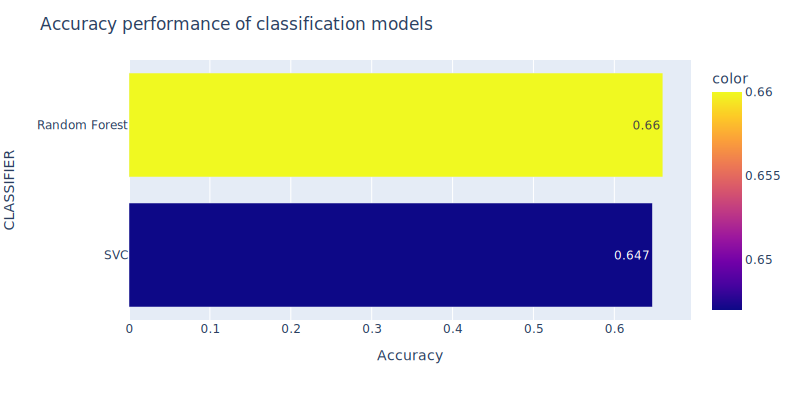

In [ ]:
# Bar plot showing each classifier
accuracy_of_models = {'SVC': svm_acc,
                      'Random Forest': rf_acc,
                      }


fig = px.bar(y = list(accuracy_of_models.keys()), x= list(accuracy_of_models.values()),
             color = list(accuracy_of_models.values()),
             width = 800, height = 400,
             color_discrete_sequence=px.colors.qualitative.G10,
             labels={'y':'CLASSIFIER', 'x':'Accuracy'}, text_auto=True)


fig.update_layout(title='Accuracy performance of classification models', showlegend=False)
fig.write_image('fig.svg', engine='kaleido')
fig.show('svg')

In [ ]:
list_of_models = [ 'SVC','Random Forest']
dictionary_models = {list_of_models[i]: trained_models[i] for i in range(len(list_of_models))}
dictionary_models

{'SVC': RandomForestClassifier(max_depth=9, max_leaf_nodes=9, random_state=42),
 'Random Forest': SVC(kernel='linear', random_state=42)}

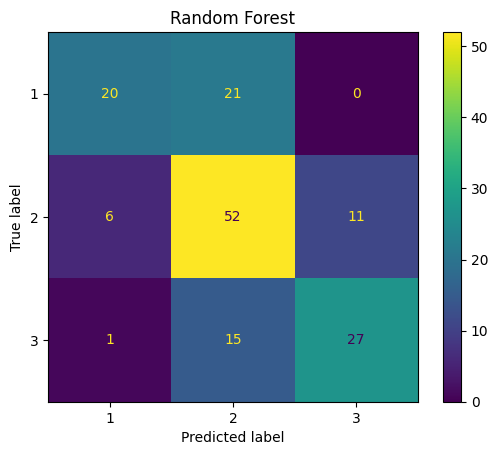

In [ ]:
# Find the highest score
scores = [svm_acc, rf_acc]
best_score = max(scores)
key_best_model = ''
best_model = ''

# Generate a heatmap for the classifier that has the highest score
for key, value in accuracy_of_models.items():
  if best_score == value:
    key_best_model = key
    best_model = dictionary_models[key_best_model]
    ConfusionMatrixDisplay.from_estimator(best_model,
                                          X_test, y_test,
                                          display_labels=['1', '2','3'])
    plt.title(key_best_model);

    #Pop the best performing model from dictionary
    dictionary_models.pop(key_best_model)


In [ ]:
# create list for features
feature = X_features.columns

In [ ]:
# Random forest
rf_importance = pd.Series(np.exp(rf_model.feature_importances_), index = feature).sort_values()

# SVM linear kernel
svm_importance = pd.Series(np.exp(svm_linear[0].coef_[0]), index = feature).sort_values()


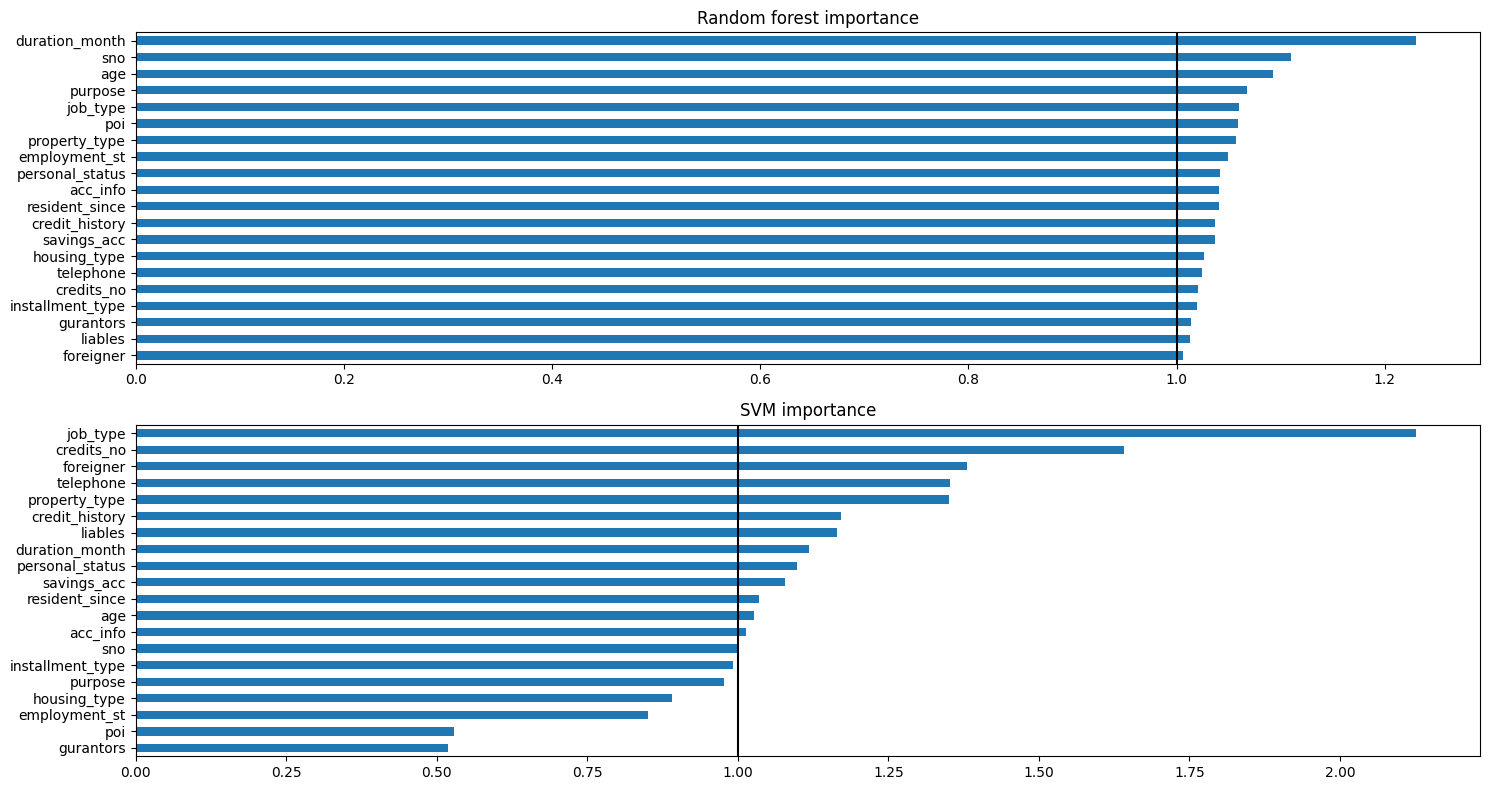

In [ ]:
# Create subplots
fig, ax = plt.subplots(2, figsize=(15, 8))

# Add the barplots
rf_importance.plot(kind = 'barh', ax = ax[0], title = 'Random forest importance')
svm_importance.plot(kind='barh', ax = ax[1], title = 'SVM importance')

# Add vertical lines at x=1
for axes_row in ax:
    axes_row.axvline(x=1, color='black')
plt.tight_layout()
plt.show()


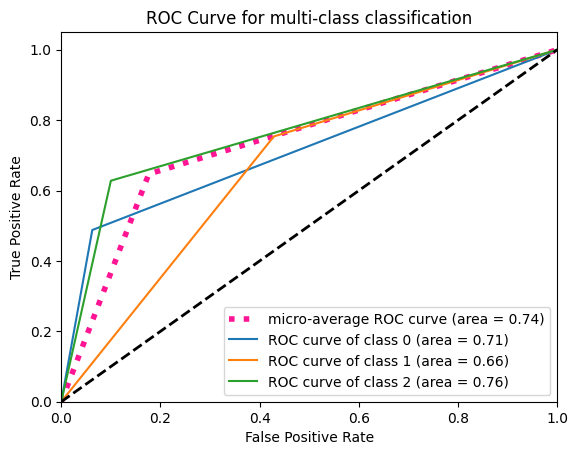

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Convert y_pred to one-hot encoded format
y_pred_onehot = label_binarize(y_pred, classes=np.unique(y_test))
y_test_onehot = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_onehot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_onehot.ravel(), y_pred_onehot.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]), color='deeppink', linestyle=':', linewidth=4)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for multi-class classification')
plt.legend(loc="lower right")
plt.show()


demo


In [ ]:
# Load sample submission file
sample_submission = pd.read_csv("C&T Bank_sample_submission.csv")


In [ ]:
# Make predictions on the test data
y_pred_test = grid_rf_model.predict(te_numeric)


In [ ]:
y_pred_test

array([2, 2, 2, 2, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 3, 2, 1,
       3, 2, 3, 2, 2, 1, 2, 3, 1, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 3, 2, 2, 2, 1, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1,
       3, 2, 3, 2, 3, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 1, 1, 1,
       3, 2, 2, 2, 2, 1, 3, 2, 1, 2, 3, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2, 1,
       2, 3, 2, 3, 2, 1, 2, 3, 2, 2, 3, 3, 2, 1, 3, 2, 1, 1, 2, 3, 2, 3,
       2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 3,
       3, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 1,
       2, 3, 1, 1], dtype=int64)